In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset loading

In [164]:
dataset = pd.read_csv('../Y3 - Sample data/Z3 - datasetprepclean.csv', index_col = 0,
                     )
print('dataset shape:', dataset.shape)
dataset.head()

dataset shape: (4534, 289)


,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,...,thick_2.0,thick_3.0,thick_4.0,thick_5.0,thick_6.0,thick_8.0,thick_10.0,thick_12.0,thick_15.0,thick_20.0
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,3178.489502,9,0,285678.093750,431798.46875,722.070984,598.000000,320484.593750,286893.718750,4.0,...,0,0,1,0,0,0,0,0,0,0
L1600470,317.114502,1,0,3403.138184,3500.00000,140.000000,25.000000,3403.138184,3403.138184,10.0,...,0,0,0,0,0,0,1,0,0,0
L1600700,625.429871,2,0,10823.929688,12759.00000,255.179993,50.000000,11152.315430,11152.315430,10.0,...,0,0,0,0,0,0,1,0,0,0
L1600710,625.429871,2,0,10823.929688,12759.00000,255.179993,50.000000,11152.315430,11152.315430,10.0,...,0,0,0,0,0,0,1,0,0,0
L1605790,2535.909668,5,0,184134.328125,355747.34375,826.389404,430.483917,230244.703125,184672.265625,5.0,...,0,0,0,1,0,0,0,0,0,0


In [165]:
dataset.columns.values

array(['cut_length', 'num_closed_patterns', 'num_open_patterns',
       'total_area', 'minimum_rectangle_area', 'minimum_rectangle_dim1',
       'minimum_rectangle_dim2', 'convex_hull_area', 'no_hole_area',
       'thickness', 'radius_approx', 'radius_count', 'direction_count',
       'bend_count', 'bend_radius_00', 'bend_angle_00',
       'bend_direction_00', 'deformation_length_00', 'merged_bend_00',
       'punch_length_00', 'bend_radius_01', 'bend_angle_01',
       'bend_direction_01', 'deformation_length_01', 'merged_bend_01',
       'punch_length_01', 'bend_radius_02', 'bend_angle_02',
       'bend_direction_02', 'deformation_length_02', 'merged_bend_02',
       'punch_length_02', 'bend_radius_03', 'bend_angle_03',
       'bend_direction_03', 'deformation_length_03', 'merged_bend_03',
       'punch_length_03', 'bend_radius_04', 'bend_angle_04',
       'bend_direction_04', 'deformation_length_04', 'merged_bend_04',
       'punch_length_04', 'bend_radius_05', 'bend_angle_05',
     

In [166]:
for index, nancount in dataset.isnull().sum().iteritems():
    if nancount != 0:
        print(index, '-->', nancount)
else:
    print('Done !')

deformation_length_00 --> 226
deformation_length_01 --> 101
deformation_length_02 --> 8
deformation_length_03 --> 3
deformation_length_04 --> 1
Done !


In [167]:
#Cleaning of the remaining Nan
#dataset = dataset.fillna(0)
dataset = dataset.dropna()
dataset.shape

(4281, 289)

# cleaning to have at least min occurences

In [168]:
minocc = 50
todrop = []
df = dataset['thickness'].reset_index().groupby('thickness').count()
for index, occ in df.iterrows():
    if occ.COART <= minocc:
        todrop.append(index)
        print(index, 'will be dropped')

for thickness in todrop:
    dataset = dataset[dataset['thickness'] != thickness]

dataset.shape

1.5 will be dropped
2.0 will be dropped
20.0 will be dropped


(4248, 289)

# Dataset re-ordering and Splitting

In [170]:
start = dataset.columns.values
todrop = ['bend_group', 'VAMAT', 'VALAJOUT', 'VALTOT', 'radius_approx', 'level_0']

#todrop.append('thickness')

def representsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False
benddetails  = [x for x in dataset.columns.values if representsInt(x[-2:])]
#todrop.extend(benddetails)

todrop.extend([x for x in dataset.columns.values if x.startswith('VOL_')])

tokeep = [x for x in start if x not in todrop ]
tokeep

['cut_length',
 'num_closed_patterns',
 'num_open_patterns',
 'total_area',
 'minimum_rectangle_area',
 'minimum_rectangle_dim1',
 'minimum_rectangle_dim2',
 'convex_hull_area',
 'no_hole_area',
 'thickness',
 'radius_count',
 'direction_count',
 'bend_count',
 'bend_radius_00',
 'bend_angle_00',
 'bend_direction_00',
 'deformation_length_00',
 'merged_bend_00',
 'punch_length_00',
 'bend_radius_01',
 'bend_angle_01',
 'bend_direction_01',
 'deformation_length_01',
 'merged_bend_01',
 'punch_length_01',
 'bend_radius_02',
 'bend_angle_02',
 'bend_direction_02',
 'deformation_length_02',
 'merged_bend_02',
 'punch_length_02',
 'bend_radius_03',
 'bend_angle_03',
 'bend_direction_03',
 'deformation_length_03',
 'merged_bend_03',
 'punch_length_03',
 'bend_radius_04',
 'bend_angle_04',
 'bend_direction_04',
 'deformation_length_04',
 'merged_bend_04',
 'punch_length_04',
 'bend_radius_05',
 'bend_angle_05',
 'bend_direction_05',
 'deformation_length_05',
 'merged_bend_05',
 'punch_length_

In [171]:
#Dataset definition
X = dataset[tokeep]
y = dataset[['VAMAT', 'VALAJOUT', 'VALTOT']]

In [172]:
# Dataset splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0 ,stratify=dataset['bend_group'])

#ONLY FOR DATASET CLEANING PURPOSE
#X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.5, random_state=0 ,stratify=dataset['bend_group'])

# Target definition

In [173]:
target = 'VALTOT'
assert target in y.columns.values, 'The target must be in y dataset'

In [174]:
y[[target]].describe()

,VALTOT
count,4248.000000
mean,7.574859
std,8.345230
min,0.320000
25%,2.510000
50%,4.480000
75%,9.512500
max,58.400000


# Blocs creation

In [175]:
#Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [176]:
# Metric MSE
from sklearn.metrics import mean_squared_error

In [177]:
# Metric MAPE Mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.metrics import make_scorer
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
mape_scorer

make_scorer(mean_absolute_percentage_error, greater_is_better=False)

In [178]:
#regressions
import lightgbm as lgb

gbm = lgb.LGBMRegressor(objective='regression',
                        learning_rate=0.05,
                        n_estimators=400,
                        min_child_samples=10,
                        random_state=0,
                        max_depth=500,
                       )

In [179]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [180]:
pipe = [('scaler', scaler), ('gbm', gbm)]
regpip = Pipeline(pipe)

In [181]:
regpip.fit(X_train, y_train[target])

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gbm', LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.05, max_depth=500, min_child_samples=10,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=400,
       n_jobs=-1, num_leaves=31, objective='regression', random_state=0,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1))])

In [182]:
param_grid = {
    #'gbm__learning_rate': [0.05, 0.1, ],
    #'gbm__n_estimators': [300, 400, 500],
    'gbm__min_child_samples' : [15,10,5],
    'gbm__lambda_l1': np.logspace(-3,3,4),
    #'gbm__lambda_l2': np.logspace(-3,3,4),
    #'gbm__max_bin':[200, 150],
    #'gbm__num_leaves':[20,25],
    #'gbm__max_depth':[500,750],
    #'gbm__min_split_gain':[0,.1]
    }

#RMSE version
gridgbm = GridSearchCV(regpip, param_grid, cv=3, n_jobs=-2, scoring='neg_mean_squared_error', verbose=5)

#MAPE version
#gridgbm = GridSearchCV(regpip, param_grid, cv=3, n_jobs=-2, scoring=mape_scorer, verbose=2)

In [183]:
gridgbm.fit(X_train, y_train[target])

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] gbm__lambda_l1=0.001, gbm__min_child_samples=15 .................
[CV] gbm__lambda_l1=0.001, gbm__min_child_samples=15 .................
[CV] gbm__lambda_l1=0.001, gbm__min_child_samples=15 .................
[CV]  gbm__lambda_l1=0.001, gbm__min_child_samples=15, score=-3.1676343280844628, total=   4.5s
[CV] gbm__lambda_l1=0.001, gbm__min_child_samples=10 .................
[CV]  gbm__lambda_l1=0.001, gbm__min_child_samples=15, score=-2.500216097487827, total=   6.7s
[CV] gbm__lambda_l1=0.001, gbm__min_child_samples=10 .................
[CV]  gbm__lambda_l1=0.001, gbm__min_child_samples=15, score=-3.9007835233024952, total=   8.4s
[CV] gbm__lambda_l1=0.001, gbm__min_child_samples=10 .................
[CV]  gbm__lambda_l1=0.001, gbm__min_child_samples=10, score=-3.249446914630888, total=   6.3s
[CV] gbm__lambda_l1=0.001, gbm__min_child_samples=5 ..................
[CV]  gbm__lambda_l1=0.001, gbm__min_child_samples=10, score

[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:   31.7s


[CV]  gbm__lambda_l1=0.1, gbm__min_child_samples=10, score=-3.2032085494742395, total=   6.9s
[CV] gbm__lambda_l1=0.1, gbm__min_child_samples=5 ....................
[CV]  gbm__lambda_l1=0.1, gbm__min_child_samples=15, score=-3.8116268331156795, total=   8.8s
[CV] gbm__lambda_l1=0.1, gbm__min_child_samples=5 ....................
[CV]  gbm__lambda_l1=0.1, gbm__min_child_samples=5, score=-2.5170779852559866, total=   5.5s
[CV] gbm__lambda_l1=0.1, gbm__min_child_samples=5 ....................
[CV]  gbm__lambda_l1=0.1, gbm__min_child_samples=5, score=-3.276931943810782, total=   7.6s
[CV] gbm__lambda_l1=10.0, gbm__min_child_samples=15 ..................
[CV]  gbm__lambda_l1=0.1, gbm__min_child_samples=10, score=-3.4086023307455, total=   8.7s
[CV] gbm__lambda_l1=10.0, gbm__min_child_samples=15 ..................
[CV]  gbm__lambda_l1=10.0, gbm__min_child_samples=15, score=-2.664422222009297, total=   3.9s
[CV] gbm__lambda_l1=10.0, gbm__min_child_samples=15 ..................
[CV]  gbm__lambd

[Parallel(n_jobs=-2)]: Done  36 out of  36 | elapsed:  1.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gbm', LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.05, max_depth=500, min_child_samples=10,
       min_child_weight=0.001, min_sp...0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1))]),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'gbm__min_child_samples': [15, 10, 5], 'gbm__lambda_l1': array([1.e-03, 1.e-01, 1.e+01, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=5)

In [184]:
target

'VALTOT'

In [185]:
gridgbm.best_params_

{'gbm__lambda_l1': 0.1, 'gbm__min_child_samples': 5}

In [186]:
gridgbm.best_score_

-3.04548160233218

In [187]:
mean_absolute_percentage_error(y_test[target], gridgbm.predict(X_test))

14.365989378715904

In [188]:
mean_squared_error(y_test[target], gridgbm.predict(X_test))

2.7506260664014803

In [189]:
mean_squared_error(y_train[target], gridgbm.predict(X_train))

0.20346109412518934

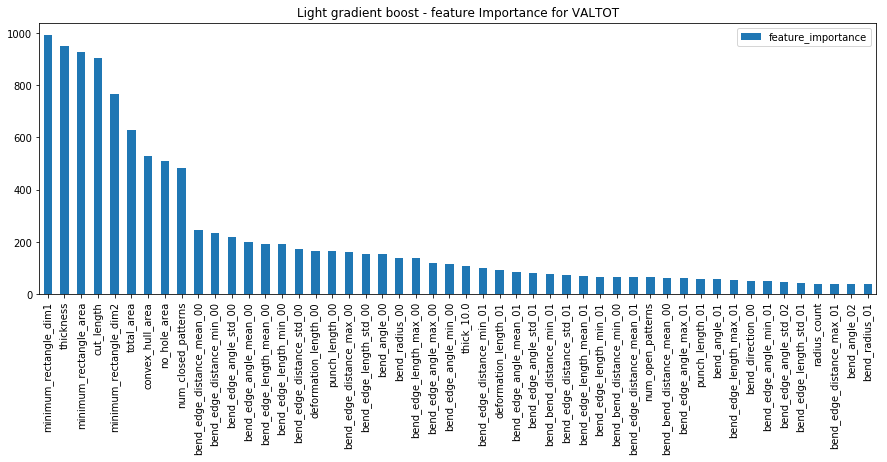

In [190]:
featimp = list(gridgbm.best_estimator_.named_steps['gbm'].feature_importances_)
df = pd.DataFrame({'feature_importance':featimp}, index =X_test.columns.values)
df = df.sort_values('feature_importance', ascending=False)
df[:50].plot.bar(figsize=(15,5))
plt.title(f'Light gradient boost - feature Importance for {target}')
plt.show()

# Solution comparison

In [191]:
prediction_lgbm = gridgbm.predict(X_test)

In [192]:
resultset = pd.DataFrame({target: y_test[target],
                          'pred_lgbm':prediction_lgbm,
                            }, index=y_test.index)
resultset.head()

,VALTOT,pred_lgbm
COART,,
L8837570,2.31,3.202617
L8044960,3.16,3.317900
L8821380,3.82,3.832236
L3064550,12.42,13.546061
L8827630,3.59,4.838583


In [193]:
mean_squared_error(resultset[target], resultset['pred_lgbm'])

2.7506260664014803

In [194]:
mean_absolute_percentage_error(resultset[target], resultset['pred_lgbm'])

14.365989378715904

In [195]:
resultset['RMSE_lgbm'] = (resultset[target]-resultset['pred_lgbm'])**2
resultset.head()

,VALTOT,pred_lgbm,RMSE_lgbm
COART,,,
L8837570,2.31,3.202617,0.796766
L8044960,3.16,3.317900,0.024932
L8821380,3.82,3.832236,0.000150
L3064550,12.42,13.546061,1.268013
L8827630,3.59,4.838583,1.558959


In [196]:
#
comparisonset = pd.merge(resultset.reset_index(), X_test.reset_index(), on='COART', how='inner')
comparisonset.head()

,COART,VALTOT,pred_lgbm,RMSE_lgbm,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,...,thick_2.0,thick_3.0,thick_4.0,thick_5.0,thick_6.0,thick_8.0,thick_10.0,thick_12.0,thick_15.0,thick_20.0
0,L8837570,2.31,3.202617,0.796766,811.922119,2,0,31718.707031,32858.871094,298.717010,...,0,0,0,1,0,0,0,0,0,0
1,L8044960,3.16,3.317900,0.024932,1797.410278,9,0,31037.583984,38694.250000,350.000000,...,0,0,1,0,0,0,0,0,0,0
2,L8821380,3.82,3.832236,0.000150,1080.497192,4,0,18720.337891,37537.500000,195.000000,...,0,0,0,0,0,1,0,0,0,0
3,L3064550,12.42,13.546061,1.268013,1902.422363,2,0,56413.332031,124459.171875,805.560974,...,0,0,0,0,0,0,1,0,0,0
4,L8827630,3.59,4.838583,1.558959,1372.988159,6,0,69079.187500,99447.296875,391.053558,...,0,0,1,0,0,0,0,0,0,0


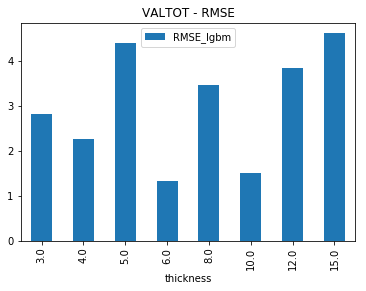

,RMSE_lgbm
thickness,
3.0,2.813726
4.0,2.254719
5.0,4.389459
6.0,1.321681
8.0,3.457410
10.0,1.513381
12.0,3.837275
15.0,4.611159


In [197]:
# Is the error sourced by thickness ?
df = comparisonset[['RMSE_lgbm', 'thickness']].groupby('thickness').mean()
df.plot.bar()
plt.title(f'{target} - RMSE')
plt.show()
df

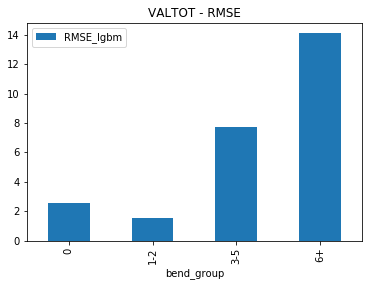

,RMSE_lgbm
bend_group,
0,2.524010
1-2,1.531258
3-5,7.717486
6+,14.096303


In [198]:
# Is the error sourced by number of errors ?
def bendgroupcalc(entry):
    if entry == 0:
        return '0'
    elif entry <= 2:
        return '1-2'
    elif entry <= 5:
        return '3-5'
    else:
        return '6+'
    return 'None'

comparisonset['bend_group'] = comparisonset['bend_count'].apply(bendgroupcalc)

df = comparisonset[['RMSE_lgbm', 'bend_group']].groupby('bend_group').mean()
df.plot.bar()
plt.title(f'{target} - RMSE')
plt.show()
df

In [199]:
comparisonset['percent_error'] = ((comparisonset[target] / comparisonset['pred_lgbm'])-1)*100
comparisonset[[target, 'pred_lgbm', 'percent_error']].head()

,VALTOT,pred_lgbm,percent_error
0,2.31,3.202617,-27.871497
1,3.16,3.317900,-4.759033
2,3.82,3.832236,-0.319292
3,12.42,13.546061,-8.312828
4,3.59,4.838583,-25.804724


In [200]:
#MAPE
comparisonset['percent_error'].mean()

0.14130558498354853

In [201]:
df = comparisonset[['RMSE_lgbm', 'percent_error', 'thickness', 'bend_group', 'COART']].groupby(['thickness', 'bend_group'])#.mean()
df.agg({'RMSE_lgbm': ['mean', 'max'], 'percent_error': ['mean', 'max'],'COART':['count'] })

RMSE_lgbm             percent_error             COART
                           mean         max          mean         max count
thickness bend_group                                                       
3.0       0            0.265841    0.745855    -11.124846   21.951310     8
          1-2          1.590580   15.778805     -2.256451   23.567817    12
          3-5          6.433845   45.532874     -4.951343    6.536091    10
          6+           2.433607    4.445547     -5.537102    8.858338     3
4.0       0            2.126013   44.570718     -3.295119   57.582840    36
          1-2          0.854507   31.347627     -1.762726   60.317540   121
          3-5          6.717773   48.601018     -2.132267   43.174772    39
5.0       0            0.854205   22.513608     -4.092479   79.312893    52
          1-2          2.835281  106.929203     -1.847404   35.657903    93
          3-5         10.294206  237.718703      0.289692   20.360627    32
          6+          50.862726  147.798926     -9.244355   11.220781     3
6.0       0            1.256704   94.744798     -1.693930   50.522920   119
          1-2          0.738342   17.516109      4.154806   60.135042   142
          3-5          5.073828   36.692919     -2.254996   29.269912    25
          6+           0.674229    1.269884      7.481213   15.242455     5
8.0       0            3.546648  217.004144      1.956101  119.016495   140
          1-2          2.265864   84.063325      1.592261   46.232782   120
          3-5          9.278045  123.227698     10.396011   49.958338    22
          6+           5.895489    5.895489     26.187222   26.187222     1
10.0      0            1.653038   37.213096     -1.926942  142.846711    83
          1-2          1.326749   10.890622      0.538565   86.417824    58
          3-5          1.403825    4.389328     -2.197710    9.384453     7
12.0      0            4.546524  116.066985      2.284961  136.868404    68
          1-2          1.540657   11.116806     -4.128729   27.182769    21
15.0      0            3.991223   38.357236      1.960565   63.906059    42
          1-2          1.087502    2.030693     -2.592525   18.800085     9
          3-5         19.048721   41.880649     26.913999   47.730490     4

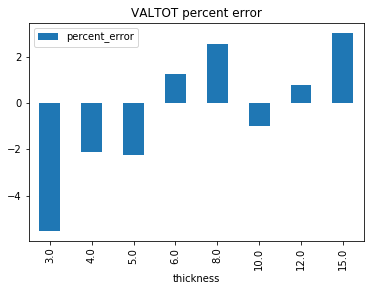

,percent_error
thickness,
3.0,-5.521240
4.0,-2.117717
5.0,-2.239336
6.0,1.269539
8.0,2.543551
10.0,-0.973536
12.0,0.771618
15.0,3.030309


In [202]:
df = comparisonset[['percent_error', 'thickness']].groupby('thickness').mean()
df.plot.bar()
plt.title(f'{target} percent error')
plt.show()
df

In [203]:
df = comparisonset[['COART', 'thickness']]
df.groupby('thickness').count()

,COART
thickness,
3.0,33
4.0,196
5.0,180
6.0,291
8.0,283
10.0,148
12.0,89
15.0,55


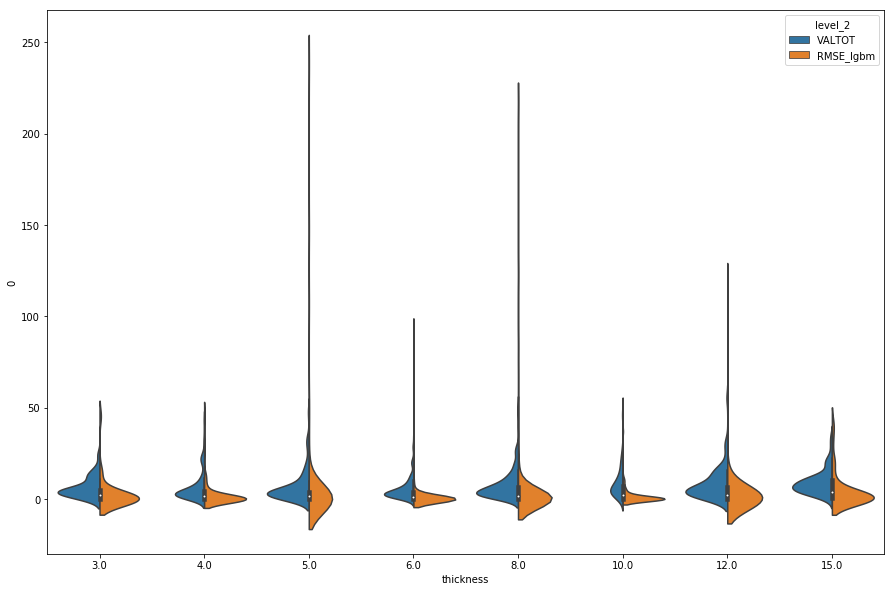

In [204]:
df=comparisonset[[target, 'RMSE_lgbm', 'COART', 'thickness']]
#df=df[df['thickness']!=15]
df.set_index(['COART', 'thickness'], inplace=True)
df = df.stack().reset_index()
fig, ax = plt.subplots(figsize=(15,10))
#ax.set_ylim(-100, 100)
sns.violinplot(x="thickness", y=0, data=df, split=True, hue='level_2', ax=ax)

plt.show()

In [205]:
df = comparisonset[['RMSE_lgbm', 'COART', 'thickness']]
df.set_index('COART', inplace=True)
worst = df.groupby('thickness')['RMSE_lgbm'].nlargest(3)
worst
#worst.to_csv('worst_s0.csv')

thickness  COART   
3.0        L7078280     45.532874
           L8403000     15.778805
           L7078290     13.091666
4.0        L8056680     48.601018
           L8833310     44.570718
           L8056810     44.549572
5.0        L8833680    237.718703
           L8819680    147.798926
           L8415701    106.929203
6.0        L6005820     94.744798
           L6005980     36.692919
           L6005981     32.048555
8.0        L3045420    217.004144
           L8835850    123.227698
           L2607600     84.063325
10.0       L3045960     37.213096
           L7011472     12.169787
           L8045980     10.890622
12.0       L3063370    116.066985
           L6816400     99.594821
           L8414000     18.166070
15.0       L7032151     41.880649
           L2512080     38.357236
           L7032161     31.626567
Name: RMSE_lgbm, dtype: float64

In [99]:
#comparison

#Thickness filter
df = comparisonset[comparisonset['thickness'] == 5]

#Cost filter Max
#df = df[df[target]<15]

#Cost filter Min
#df = df[df[target]>10] #bend_count

#Min rectangle area
df = df[df['minimum_rectangle_area'] < 650000]
df = df[df['minimum_rectangle_area'] > 550000]

#bend_count filter
df = df[df['bend_count'] == 4]

#df[df['COART']=='L3128890'].T
df.T

,133,499,645,752
COART,L7013792,L7065760,L7013791,L8833680
VALTOT,31.49,34.41,33.38,26.56
pred_lgbm,36.2251,35.778,36.2251,42.8709
RMSE_lgbm,22.4215,1.87146,8.09479,266.046
cut_length,5031.84,4435.58,4994.07,4971.6
num_closed_patterns,27,1,27,17
num_open_patterns,0,0,0,0
total_area,406096,419652,406265,311781
minimum_rectangle_area,569965,574937,569972,597627
minimum_rectangle_dim1,805.741,2017.84,805.751,780.139


In [93]:
dataset.loc[['L8833680']].T
#comparisonset[comparisonset['COART'] == 'L3131690']

COART,L8833680
cut_length,4971.6
num_closed_patterns,17
num_open_patterns,0
total_area,311781
minimum_rectangle_area,597627
minimum_rectangle_dim1,780.139
minimum_rectangle_dim2,766.052
convex_hull_area,470656
no_hole_area,326244
thickness,5
